# Sentinel-2 Classification Results Analysis

## Exporting Computed Parameters

This program takes the .txt outputs from the classification script to summarize and characterize numerical results. The program provides the necessary computations as well as the ability to export results into a .csv file. 

In [4]:
import rasterio
from rasterio import mask
from pylab import *
import numpy as np
import sys, os
import pandas as pd
import h5py
from PIL import Image
import csv

In [5]:
output_loc= 'CHANGE PATH HERE'# The text file where the output is saved from the classification script
df2=pd.read_csv(output_loc, delimiter='\t',names=['tile','im','border','ice','ow','mp','other'])

# Calculate Melt Pond Fraction (MPF) and Sea Ice Concentration (SIC)
df2['mpf']=df2.mp/(df2.mp+df2.ice)
df2['sic']=(df2.ice+df2.mp)/(df2.ice+df2.mp+df2.ow)
df2['surface']=(df2.im)-(df2.border)

# Don't calculate MPF for tiles with SIC less than 15%, turn to nan
for b in df2[df2.sic<.15].index.values:
    df2.at[b,'mpf']=np.nan
    
# Day of year is extracted based on the filename conventions
df2['doy']=[datetime.datetime.strptime(a,'%Y%m%d').timetuple().tm_yday for a in [a[7:15] for a in df2.tile]]

# Save to new csv
csv_loc='NAME OF CSV FILE HERE' # The location you want to save the csv
df2.to_csv(csv_loc)

## Metric Trends

The following cell allows users to generate boxplots of the computed metrics. Users may adjust and append parameters to their needs.

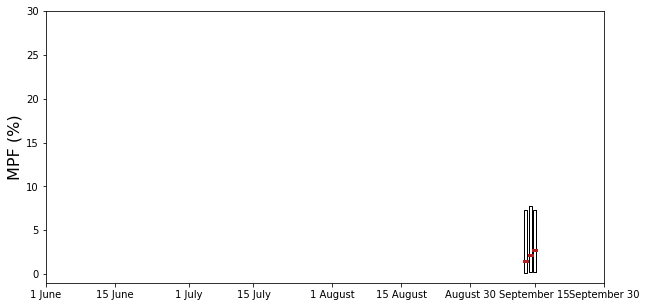

In [8]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
med=[]
mean=[]
count=[]
std=[]
p75=[]
p25=[]
x=[]


medianprops = dict(linestyle='-', linewidth=3, color='firebrick')
#d=plt.scatter(1000,1000,c='k',s=10,label='5 day MPF mean')
boxprops=dict(facecolor="None")

for a in np.arange(152,244):
    if len(df[(df.doy> (a-2))&(df.doy< (a+2))])>20:
        x.append(a)       
        med.append(df[(df.doy> (a-2))&(df.doy< (a+2))]['mpf'].median()*100)
        mean.append(df[(df.doy> (a-2))&(df.doy< (a+2))]['mpf'].mean()*100)
        count.append(len(df[(df.doy> (a-2))&(df.doy< (a+2))]['mpf']))
        std.append(df[(df.doy> (a-2))&(df.doy< (a+2))]['mpf'].std()*100)
        p75.append(np.percentile(df[(df.doy> (a-2))&(df.doy< (a+2))]['mpf']*100,75))
        p25.append(np.percentile(df[(df.doy> (a-2))&(df.doy< (a+2))]['mpf']*100,25))
        b= plt.boxplot(df[(df.doy> (a-2))&(df.doy< (a+2))]['mpf'].values*100, positions=[a], widths=[0.7],whis=False, showfliers=False,patch_artist=True,medianprops=medianprops, boxprops=boxprops,zorder=3)
        #ax[1].text(a-.5,p75[-1]+2,str(count[-1]),rotation='vertical',fontweight='bold')

for a in np.arange(244,273):
    if len(df2[(df2.doy> (a-2))&(df2.doy< (a+2))])>20:
        x.append(a)       
        med.append(df2[(df2.doy> (a-2))&(df2.doy< (a+2))]['mpf'].median()*100)
        mean.append(df2[(df2.doy> (a-2))&(df2.doy< (a+2))]['mpf'].mean()*100)
        count.append(len(df2[(df2.doy> (a-2))&(df2.doy< (a+2))]['mpf']))
        std.append(df2[(df2.doy> (a-2))&(df2.doy< (a+2))]['mpf'].std()*100)
        p75.append(np.percentile(df2[(df2.doy> (a-2))&(df2.doy< (a+2))]['mpf']*100,75))
        p25.append(np.percentile(df2[(df2.doy> (a-2))&(df2.doy< (a+2))]['mpf']*100,25))
        b= plt.boxplot(df2[(df2.doy> (a-2))&(df2.doy< (a+2))]['mpf'].values*100, positions=[a], widths=[0.7],whis=False, showfliers=False,patch_artist=True,medianprops=medianprops, boxprops=boxprops,zorder=3)
        #ax[1].text(a-.5,p75[-1]+2,str(count[-1]),rotation='vertical',fontweight='bold')
        
        
ax.set_ylabel('MPF (%)',fontsize=16)
ax.xaxis.set_tick_params(labeltop=False,labelbottom=True)
ax.set_ylim(-1,30)
ax.set_xlim(152,273)

plt.xticks([152,167,183,197,214,229,244,258,273],['1 June','15 June','1 July','15 July', '1 August', '15 August','August 30', 'September 15','September 30']);